In [2]:
import json
with open("all_author4new_tokens.json", encoding='utf-8') as f:
    all_text_tokens = json.load(f)

In [4]:
texts = list(all_text_tokens.values())


In [6]:
import os

# 文件夹路径
folder_path = 'Author4'

file_folder_mapping = {}
file_list=[]

# 遍历文件夹中的文件和文件夹
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        # 只处理.txt文件
        if file_name.endswith('.txt'):
            # 使用文件名作为键，文件夹名作为值
            file_folder_mapping[file_name[:-4]] = os.path.basename(root)
            file_list.append(file_name[:-4])

print(len(file_folder_mapping))
print(len(file_list))

39
39


In [8]:
from collections import Counter
from itertools import chain

# === Assume `texts` is a list of token lists ===
# Example: texts = [['我', '是'], ['他', '也', '是'], ...]

# === Step 0: Define stoplist ===
stoplist = set([
    
])

# Step 1: Document frequency counter
doc_freq = Counter()
for tokens in texts:
    doc_freq.update(set(tokens))

# Step 2: Global term frequency
flat_tokens = list(chain.from_iterable(texts))
word_counts = Counter(flat_tokens)

# Step 3: Filter by document frequency and stoplist
filtered_word_counts = {
    word: freq for word, freq in word_counts.items()
    if doc_freq[word] >= 1 and word not in stoplist
}

# Step 4: Get top-N words for vocab
N = 400
top_N = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)[:N]
vocab = [word for word, _ in top_N]

# Step 5: Print results
for i, (word, freq) in enumerate(top_N, 1):
    print(f"{i:>3}. {word:<10} — {freq} times")


  1. 之          — 53676 times
  2. 曰          — 19023 times
  3. 而          — 18749 times
  4. 吾          — 18217 times
  5. 此          — 18193 times
  6. 余          — 18069 times
  7. 以          — 17768 times
  8. 其          — 16871 times
  9. 人          — 15152 times
 10. 不          — 14552 times
 11. 亦          — 12621 times
 12. 者          — 11640 times
 13. 一          — 11020 times
 14. 中          — 10709 times
 15. 有          — 10679 times
 16. 我          — 9738 times
 17. 於          — 9710 times
 18. 爲          — 9262 times
 19. 乃          — 9044 times
 20. 言          — 8540 times
 21. 也          — 8434 times
 22. 至          — 8205 times
 23. 為          — 8057 times
 24. 則          — 7974 times
 25. 見          — 7968 times
 26. 已          — 7557 times
 27. 所          — 7528 times
 28. 爾          — 7421 times
 29. 矣          — 7273 times
 30. 無          — 7203 times
 31. 卽          — 6842 times
 32. 汝          — 6556 times
 33. 時          — 6537 times
 34. 然          — 6250 times

In [10]:
import pandas as pd

# Initialize matrix rows
vectors = []

for tokens in texts:
    token_count = len(tokens)
    counter = Counter(tokens)
    vector = [counter[word] / token_count if token_count > 0 else 0 for word in vocab]
    vectors.append(vector)

# Create DataFrame
df_vectors = pd.DataFrame(vectors, columns=vocab)



In [12]:


df_meta = pd.DataFrame({
    "filename": file_list,
    "folder": [file_folder_mapping.get(fn, "unknown") for fn in file_list]
})


In [14]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0000014)
df_reduced = selector.fit_transform(df_vectors)


In [16]:


# Get mask of kept features
mask = selector.get_support()

# Apply to column names
retained_features = df_vectors.columns[mask]

# Optionally convert back to DataFrame
df_reduced_df = pd.DataFrame(df_reduced, columns=retained_features)


In [18]:
# Get mask of retained features (True = kept)
mask = selector.get_support()

# All feature names from original DataFrame
all_features = df_vectors.columns

# Get removed features
removed_features = all_features[~mask]

# Print removed features
print(f"❌ {len(removed_features)} features were removed (low variance ≤ 0.00001):\n")
for feature in removed_features:
    print(feature)


❌ 312 features were removed (low variance ≤ 0.00001):

無
時
與
自
如
行
知
能
出
今
何
復
事
聞
尚
語
非
將
不能
入
當
又
欲
遂
似
立
前
未
果
皆
若
勿
歸
心
狀
此時
更
乎
力
蓋
作
令
故
甚
耶
或
數
但
取
地
惟
忽
耳
諸
聲
生
書
既
雖
同
意
方
身
謂
告
視
觀
物
起
呼
旣
處
手
足
顧
聽
四
因
均
間
多
天
久
安
始
引
固
弗
盡
少
水
神
極
尤
馬
成
近
石
趣
實
其人
次
仍
用
竟
殊
發
須
於是
父
兩
過
禮
鹹
居
食
外
念
問
坐
頗
名
待
往
長
命
直
幸
年
輩
決
巨
今日
目
從
屍
計
覺
夫
止
凡
並
衣
先
向
家
面
之中
屬
至於
不知
初
胡
妻
殺
幾
母
愛
動
留
至此
請
高
兵
英
本
猶
萬
深
女王
願
進
就
山
宜
適
子
使
遠
絕
奴
如是
受
鐘
較
鬼
相
正
洞
爭
種
海
易
經
鳥
加
口
島
可以
望
佳
樹
車
別
脫
風
微
之上
審
舉
門
樂
置
被
悉
試
備
恆
老
莫
遇
首
客
否
隨
由
槍
分
法
百
老人
笑
火
巳
己
夜
怒
美
設
牛
開
示
如何
圖
定
登
公
兒
章
上帝
敵
雲
特
難
類
各
異
尺
婦人
吾輩
明日
先生
指
信
狗
良
句
主人
想
半
求
授
林
殆
羣
五
內
僅
明
親
敢
以爲
恐
執
合
善
繩
獺
黑
臥
赴
度
防
以為
重
亨利
十
逾
觸
有人
飲
助
藏
少年
全
哉
勝
室
答
漸
曾
足以


In [20]:
# Get mask of retained features (True = kept)
mask = selector.get_support()

# Get retained feature names
retained_features = df_vectors.columns[mask]

# Print the result
print(f"✅ {len(retained_features)} features were retained (variance > 0.00001):\n")
for feature in retained_features:
    print(feature)


✅ 88 features were retained (variance > 0.00001):

之
曰
而
吾
此
余
以
其
人
不
亦
者
一
中
有
我
於
爲
乃
言
也
至
為
則
見
已
所
爾
矣
卽
汝
然
且
可
得
及
彼
上
大
二
死
女
在
日
必
下
後
來
是
君
去
王
舟
卷
衆
小
三
思
餘
船
司
即
記
道
他
的
那
國
金
了
再
愛力克
新
彼得
等
翁
都
黎恩那
公主
第
夫人
說
著
佛爾支
伊娃
象
集
予


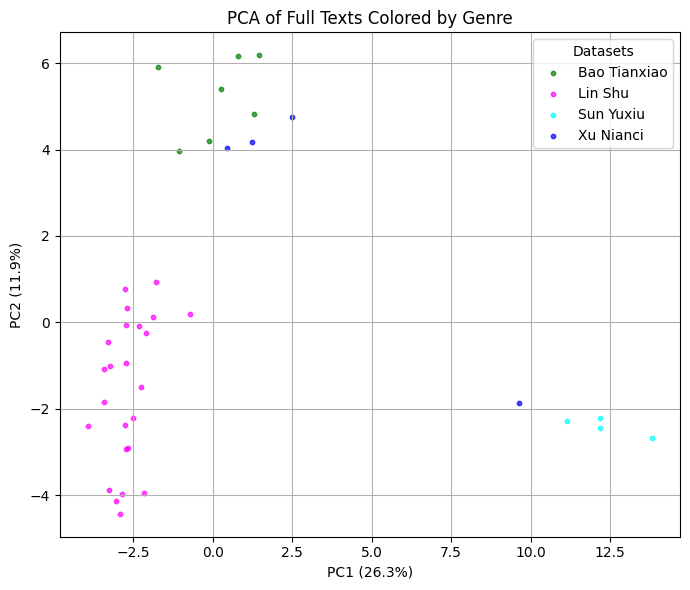

In [22]:
import pandas as pd
from collections import Counter
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#
# Optional color mapping
genreColor = {
    'Lin Shu':"magenta",'Bao Tianxiao':"green",'Xu Nianci':'blue', 'Wu Tao':'black', 
              'Tang Hongfu':"red",'Zhou Guisheng':"purple",'Sun Yuxiu':"aqua"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === STEP 4: Standardize and apply PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === STEP 5: Plot PCA (no text labels) ===
plt.figure(figsize=(7, 6))

for genre, group in df_meta.groupby("folder"):
    indices = group.index
    plt.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=10
    )

plt.title("PCA of Full Texts Colored by Genre")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

plt.legend(title="Datasets")
plt.grid(True)
plt.tight_layout()
#plt.savefig("pca_filtered300_varianceadjusted3.png", dpi=300, bbox_inches='tight')
plt.show()


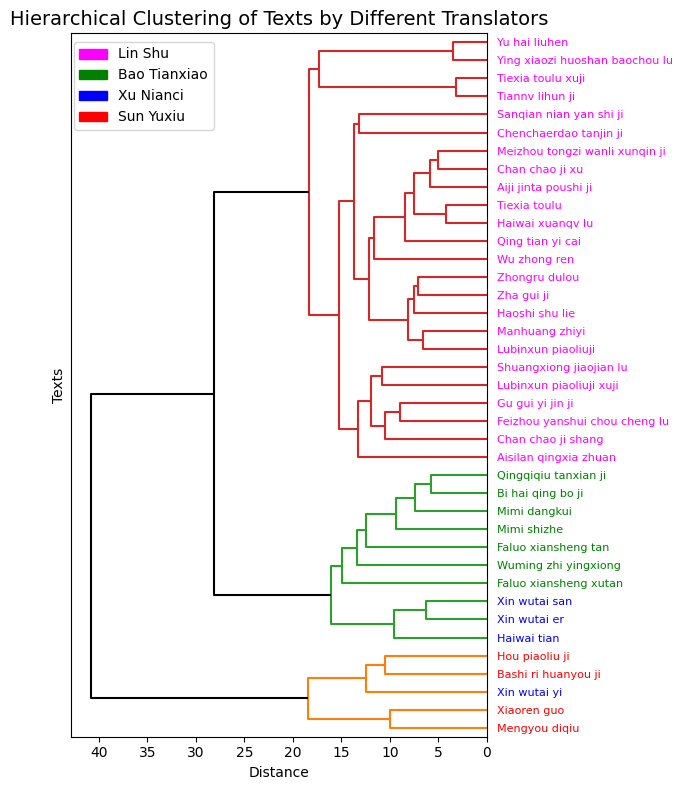

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# === 假设你已有 df_vectors, df_meta，其中 df_meta 包含 'filename' 和 'folder' ===

# 1. Genre → color 映射
genre_color_map = {
    'Lin Shu': "magenta", 'Bao Tianxiao': "green", 'Xu Nianci': 'blue',
    'Sun Yuxiu': "red"
}
df_meta = df_meta.copy()
df_meta["color"] = df_meta["folder"].map(genre_color_map).fillna("gray")
label_to_color = df_meta.set_index("filename")["color"].to_dict()

# 2. 层次聚类
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)
Z = linkage(X_scaled, method="ward")

# 3. 获取标签顺序（用于后续配色）
labels = df_meta["filename"].tolist()
label_colors = [label_to_color.get(name, "gray") for name in labels]

# 4. 画 dendrogram（带标签，每个标签颜色不同）
fig, ax = plt.subplots(figsize=(6, 8))
dendro = dendrogram(
    Z,
    orientation="left",
    labels=labels,
    leaf_font_size=8,
    color_threshold=0.5 * np.max(Z[:, 2]),
    above_threshold_color='black',
    ax=ax
)

# 5. 根据叶子顺序设置每个标签颜色
xlbls = ax.get_yticklabels()
leaf_order = dendro["leaves"]
for lbl, i in zip(xlbls, leaf_order):
    filename = df_meta.iloc[i]["filename"]
    lbl.set_color(label_to_color.get(filename, "gray"))

# 6. 美化图表
ax.set_title("Hierarchical Clustering of Texts by Different Translators", fontsize=14)
ax.set_xlabel("Distance")
ax.set_ylabel("Texts")

# 图例
legend_patches = [mpatches.Patch(color=c, label=g) for g, c in genre_color_map.items()]
# 图例（更新位置）
# 图例（放在整个图像的左上角，而非仅限于坐标轴）
fig.legend(
    handles=legend_patches,
    loc="upper left",
    bbox_to_anchor=(0.05, 0.95),  # 相对于整张图的左上角
    frameon=True,
    fontsize=10
)



plt.tight_layout()
plt.subplots_adjust(right=0.75)

fig.savefig("HCA_labels_colored_translators4.pdf", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === 假设你已有 df_vectors 和 df_meta，其中 df_meta 包含 'filename' 和 'folder' ===

# 1. Genre → color 映射
genre_color_map = {
    'Lin Shu':"magenta",'Bao Tianxiao':"green",'Xu Nianci':'blue', 'Wu Tao':'black', 
              'Tang Hongfu':"red",'Zhou Guisheng':"purple",'Sun Yuxiu':"aqua"
}
df_meta = df_meta.copy()
df_meta["color"] = df_meta["folder"].map(genre_color_map).fillna("gray")
label_to_color = df_meta.set_index("filename")["color"].to_dict()

# 2. 层次聚类
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)
Z = linkage(X_scaled, method="ward")

# 3. 画 dendrogram（不显示标签）
fig, ax = plt.subplots(figsize=(8, 10))
max_d = np.max(Z[:, 2])
cutoff = 0.5 * max_d



dendro = dendrogram(
    Z,
    orientation="left",
    labels=None,
    no_labels=True,
    color_threshold=cutoff,       # ← sets colored clusters
    above_threshold_color='black',
    ax=ax
)


for line in ax.get_lines():
    line.set_linewidth(0.8)  # reduce visual weight




# 4. 获取叶子节点顺序与对应颜色
leaf_order = dendro["leaves"]
leaf_filenames = df_meta.iloc[leaf_order]["filename"].tolist()
leaf_colors = [label_to_color.get(name, "gray") for name in leaf_filenames]

# 5. 提取真实的 y 坐标
icoord = dendro["icoord"]
dcoord = dendro["dcoord"]

leaf_y_coords = []
seen = 0
for xs, ys in zip(icoord, dcoord):
    for i, y_val in enumerate(ys):
        if y_val == 0.0:  # 是叶节点
            y_pos = xs[i]
            leaf_y_coords.append(y_pos)
            seen += 1
            if seen >= len(leaf_order):
                break
    if seen >= len(leaf_order):
        break

# 6. 创建 inset_axes 画色块
inset_ax = inset_axes(
    ax, width="2.5%", height="100%", loc="right",
    bbox_to_anchor=(0.03, 0, 1, 1),  # 向右稍偏，避免重叠
    bbox_transform=ax.transAxes,
    borderpad=0
)
inset_ax.set_xlim(0, 1)
inset_ax.set_ylim(ax.get_ylim())
inset_ax.axis('off')

# 7. 绘制彩色方块（确保无 overlap）
block_height = 6.55
for y, color in zip(leaf_y_coords, leaf_colors):
    inset_ax.add_patch(plt.Rectangle(
        (0, y - block_height / 2),
        width=1,
        height=block_height,
        facecolor=color,
        edgecolor='black',
        linewidth=0.2
    ))

# 8. 美化与图例
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Hierarchical Clustering with Genre Color Blocks", fontsize=14)
ax.set_xlabel("Distance")

legend_patches = [mpatches.Patch(color=c, label=g) for g, c in genre_color_map.items()]
ax.legend(handles=legend_patches, loc="upper left")

plt.tight_layout()
plt.subplots_adjust(right=0.82)
plt.show()
#fig.savefig("HCA300_varianceadjusted3.png", dpi=300)

In [ ]:
features = df_vectors.columns[selector.get_support()]
print(len(features))

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T * 50,       # scale for visualization
    columns=["PC1", "PC2"],
    index=features
)


In [ ]:
# Top 10 words most strongly correlated with PC1
print("Top contributors to PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(10))

print("\nTop negative contributors to PC1:")
print(loadings["PC1"].sort_values().head(10))


In [ ]:
# Top 10 words most strongly correlated with PC1
print("Top contributors to PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(10))

print("\nTop negative contributors to PC2:")
print(loadings["PC2"].sort_values().head(10))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold



# === Step 2: Genre to color mapping ===
genreColor = {
    'Lin Shu':"magenta",'Bao Tianxiao':"green",'Xu Nianci':'blue', 'Wu Tao':'black', 
              'Tang Hongfu':"red",'Zhou Guisheng':"purple",'Sun Yuxiu':"aqua"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === Step 3: Standardize selected features ===
X_scaled = StandardScaler().fit_transform(df_reduced)

# === Step 4: Apply PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 5: Compute loadings ===

# === Step 6: Select top contributors ===
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(25)
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(25)
top_features = top_pc1.index.union(top_pc2.index)
df_top_loadings = loadings.loc[top_features]

# === Step 7: Plot PCA scatter + loadings ===
plt.figure(figsize=(10, 8))

# Plot documents by genre (safe: use boolean mask)
for genre, group in df_meta.groupby("folder"):
    indices = group.index
    plt.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=10
    )


# Plot loadings: arrows + text
for word, row in df_top_loadings.iterrows():
    x, y = row["PC1"], row["PC2"]
    
    plt.text(
        x, y, word,
        fontsize=12,
        color='black',
        ha='center',
        va='center',
        fontname='STSong',
        weight='bold'
    )


# Final layout
plt.title("PCA of Texts with Top Feature Loadings (×100)", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Genre", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: save loadings
df_top_loadings.to_csv("pca_top_loadings_variance_threshold.csv", encoding="utf-8-sig")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold



# === Step 2: Genre to color mapping ===
genreColor = {
    'Lin Shu':"magenta",'Bao Tianxiao':"green",'Xu Nianci':'blue', 'Wu Tao':'black', 
              'Tang Hongfu':"red",'Zhou Guisheng':"purple",'Sun Yuxiu':"aqua"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === Step 3: Standardize selected features ===
X_scaled = StandardScaler().fit_transform(df_reduced)

# === Step 4: Apply PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 5: Compute loadings ===

# === Step 6: Select top contributors ===
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(25)
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(25)
top_features = top_pc1.index.union(top_pc2.index)
df_top_loadings = loadings.loc[top_features]

# === Step 7: Plot PCA scatter + loadings ===
plt.figure(figsize=(10, 9))

# Plot documents by genre (safe: use boolean mask)
for genre in df_meta["folder"].unique():
    mask = df_meta["folder"] == genre
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=15
    )

# Plot axes
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axvline(0, color='black', lw=0.5, linestyle='--')

# Plot loadings: arrows + text
for word, row in df_top_loadings.iterrows():
    x, y = row["PC1"], row["PC2"]
    plt.plot([0, x], [0, y],
         color='gray', alpha=0.3, lw=0.8)

    plt.text(
        x, y, word,
        fontsize=11,
        color='black',
        ha='center',
        va='center',
        fontname='STSong',
        weight='bold'
    )


# Final layout
plt.title("PCA of Texts with Top Feature Loadings (×50)", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Genre", fontsize=10)
plt.grid(True)
plt.tight_layout()
#plt.savefig("pca_top100_loadings300_varianceadjusted4.png", dpi=1000, bbox_inches='tight')
#plt.savefig("pca_translators_varianceadjusted.pdf", bbox_inches='tight', dpi=1000)

plt.show()

# Optional: save loadings
df_top_loadings.to_csv("pca_top_loadings_variance_translator.csv", encoding="utf-8-sig")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === STEP 1: Walk through subfolders and collect filenames and genres ===
data_root = "corpus318"  # Replace this with your actual path

filenames = []
genres = []

for genre in os.listdir(data_root):
    genre_path = os.path.join(data_root, genre)
    if os.path.isdir(genre_path):
        for fname in os.listdir(genre_path):
            if fname.endswith(".txt"):
                full_path = os.path.join(genre_path, fname)
                filenames.append(full_path)
                genres.append(genre)

# === STEP 2: Create metadata DataFrame ===
df_meta = pd.DataFrame({
    "filename": filenames,
    "genre": genres
})

genreColor = {
    'original Chinese adventure fiction': "magenta",
    'translated adventure fiction': "green",
    'Chinese martial arts fiction': "blue"
}
df_meta["color"] = df_meta["genre"].map(genreColor).fillna("gray")

# === STEP 3: df_reduced should be created before this step ===
# It should align with df_meta in row order
# Example: df_reduced = some_vectorizer.fit_transform(texts)

# For illustration only — replace with your real feature matrix
# df_reduced = np.random.rand(len(filenames), 300)  # Replace with actual data

# === STEP 4: Standardize and apply PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_meta["PC1"] = X_pca[:, 0]
df_meta["PC2"] = X_pca[:, 1]

# === STEP 5: Plot PCA ===
plt.figure(figsize=(7, 6))
for genre, group in df_meta.groupby("genre"):
    indices = group.index
    plt.scatter(
        df_meta.loc[indices, "PC1"],
        df_meta.loc[indices, "PC2"],
        label=genre,
        color=genreColor.get(genre, "gray"),
        alpha=0.7,
        s=10
    )

plt.title("PCA of Full Texts Colored by Genre")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Genres")
plt.grid(True)
plt.tight_layout()
#plt.savefig("pca_genres.pdf", bbox_inches='tight')
plt.show()

# === STEP 6: Print top and bottom texts by PCA axes ===
top10_PC1 = df_meta.nlargest(10, "PC1")
bottom10_PC1 = df_meta.nsmallest(10, "PC1")
top10_PC2 = df_meta.nlargest(10, "PC2")
bottom10_PC2 = df_meta.nsmallest(10, "PC2")

print("Top 10 PC1:\n", top10_PC1[["filename", "PC1"]])
print("\nBottom 10 PC1:\n", bottom10_PC1[["filename", "PC1"]])
print("\nTop 10 PC2:\n", top10_PC2[["filename", "PC2"]])
print("\nBottom 10 PC2:\n", bottom10_PC2[["filename", "PC2"]])


In [ ]:
# Save top and bottom 10 by PC1
top10_PC1.to_csv("top10_PC1.csv", index=False, encoding='utf-8-sig')
bottom10_PC1.to_csv("bottom10_PC1.csv", index=False, encoding='utf-8-sig')

# Save top and bottom 10 by PC2
top10_PC2.to_csv("top10_PC2.csv", index=False, encoding='utf-8-sig')
bottom10_PC2.to_csv("bottom10_PC2.csv", index=False, encoding='utf-8-sig')


In [ ]:
import pandas as pd
from collections import Counter
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Optional color mapping
genreColor = {
    'Lin Shu': "magenta", 'Bao Tianxiao': "green", 'Xu Nianci': 'blue', 'Wu Tao': 'black',
    'Tang Hongfu': "red", 'Zhou Guisheng': "purple", 'Sun Yuxiu': "aqua"
}
df_meta["color"] = df_meta["folder"].map(genreColor).fillna("gray")

# === STEP 4: Standardize and apply PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === STEP 5: Plot PCA with filename labels ===
plt.figure(figsize=(10, 8))

for i in range(len(df_meta)):
    x = X_pca[i, 0]
    y = X_pca[i, 1]
    color = df_meta.iloc[i]["color"]
    filename = df_meta.iloc[i]["filename"]
    
    plt.scatter(x, y, color=color, s=10, alpha=0.7)
    plt.text(x + 0.01, y + 0.01, filename, fontsize=6, alpha=0.8)  # Slight offset for readability

plt.title("PCA of Full Texts with Filename Labels")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_with_labels.png", dpi=300, bbox_inches='tight')  # Save as high-res PNG
plt.show()
